In [11]:
import networkx as nx
import seaborn as sns
import numpy as np
from numpy import inf

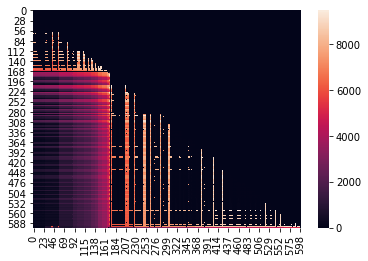

In [12]:
from os.path import join, abspath, dirname

path = join('.', '..', 'tests/out/graph.gexf')
G = nx.read_gexf(path)

nodelist = list(G.nodes())
matrix = np.array(nx.floyd_warshall_numpy(G, nodelist=nodelist, weight='weight'))
matrix[matrix == inf] = 0
matrix = np.nan_to_num(matrix)
sns.heatmap(matrix)

In [40]:
G.

In [48]:
import numpy as np

cycles = []
paths = []
for i, _ in enumerate(matrix):
    for j, _ in enumerate(matrix[i]):
        a = matrix[i, j]
        b = matrix[j, i]
        if i == j:
            continue
        
        anode = nodelist[i]
        bnode = nodelist[j]
        if a != np.inf:
            paths.append((anode, bnode, a))
        if b != np.inf:
            paths.append((bnode, anode, b))
        if a != np.inf and b != np.inf:
            cycles.append((anode, bnode, a, b, a + b))
cycles = sorted(cycles, key=lambda c: c[-1])
len(cycles)

0

In [51]:
list(nx.all_shortest_paths(G, "(4228, 4261, 1, 'PCR_PRODUCT')", "(1, 4219, 1, 'PCR_PRODUCT')"))

NetworkXNoPath: Target (1, 4219, 1, 'PCR_PRODUCT') cannot be reachedfrom Source (4228, 4261, 1, 'PCR_PRODUCT')

In [49]:
paths

[("(1, 4219, 1, 'PCR_PRODUCT')", "(4228, 4261, 1, 'PCR_PRODUCT')", 108.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')", "(4228, 5920, 1, 'PCR_PRODUCT')", 108.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')", "(5896, 5939, 1, 'PRIMER')", 158.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')", "(5948, 9408, 1, 'PCR_PRODUCT')", 235.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')",
  "(5948, 5980, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')",
  235.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')",
  "(5948, 6002, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')",
  235.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')",
  "(5948, 6041, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')",
  235.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')",
  "(5948, 6082, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')",
  235.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')",
  "(5948, 6106, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')",
  235.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')",
  "(5948, 6246, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')",
  235.0),
 ("(1, 4219, 1, 'PCR_PRODUCT')",
  "(5948, 6268, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')",
  235.0),
 ("(1, 4219, 1, 'PCR_PRODU

In [37]:
from more_itertools import pairwise

for c in cycles[:10]:
    path1 = nx.shortest_path(G, c[0], c[1])
    path2 = nx.shortest_path(G, c[1], c[0])
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        print(n1)
        print(n2)
        print(G[n1][n2])
    print()

725_start
755_stop
{'edge_type': 'molecule', 'stop': 755, 'start': 725, 'id': '158', 'weight': 1.0}
755_stop
725_start
{'edge_type': 'assembly', 'stop': 755, 'g1': 'Region(start=133 end=755, name=pMODKan-HO-pACT1-Z4-: pMODKan-HO-pACT1-Z4-, direction=1, context=Context(length=9408, circular=False, start_index=1))', 'g2': 'Region(start=725 end=4219, name=pMODKan-HO-pACT1-Z4-: pMODKan-HO-pACT1-Z4-, direction=1, context=Context(length=9408, circular=False, start_index=1))', 'name': 'overlap', 'start': 725, 'id': '160', 'weight': 50.0}

7356_start
7407_stop
{'edge_type': 'molecule', 'stop': 7407, 'start': 7356, 'id': '237', 'weight': 1.0}
7407_stop
7356_start
{'edge_type': 'assembly', 'stop': 7407, 'g1': 'Region(start=7298 end=7407, name=pMODKan-HO-pACT1-Z4-: pMODKan-HO-pACT1-Z4-, direction=1, context=Context(length=9408, circular=False, start_index=1))', 'g2': 'Region(start=7356 end=9256, name=pMODKan-HO-pACT1-Z4-: pMODKan-HO-pACT1-Z4-, direction=1, context=Context(length=9408, circular=Fa

from more_itertools import pairwise

for c in cycles[:10]:
    path1 = nx.shortest_path(G, c[0], c[1])
    path2 = nx.shortest_path(G, c[1], c[0])
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        print(n1)
        print(n2)
        print(G[n1][n2])
    print()